# Validation

In [1]:
%matplotlib inline
from matplotlib.pylab import *

In [2]:
# Setup matplotlib font
#font = {"family": "Times New Roman", "weight": "heavy", "size": 25}
font = {"family": "Serif", "weight": "normal", "size": 25}
rc("font", **font)
rcParams.update({"mathtext.default": "regular"})

## Set-up parameters

In [81]:
#kws = parameters()
Nt = 200
params = {
    "Nx": 30,
    "Nt": Nt,
    "T": 3000,
    "D": 1.1e-8,
    "Tend": 300.0, # only used in wavefit
    "L": 2e-5,
    "I": None,
    "ku": 1e-33,
    "kd": 2e-33,
    "ks": 1e18,
    "PLOT": False,
    'ncorrection': 2,
}
params["Uinit"] = np.zeros(params["Nx"] + 1)

params["G"] = np.zeros(params["Nt"] + 1)
params["G"][:int(Nt*0.8)] = 1

## Calculate and plot

<Figure size 432x288 with 0 Axes>

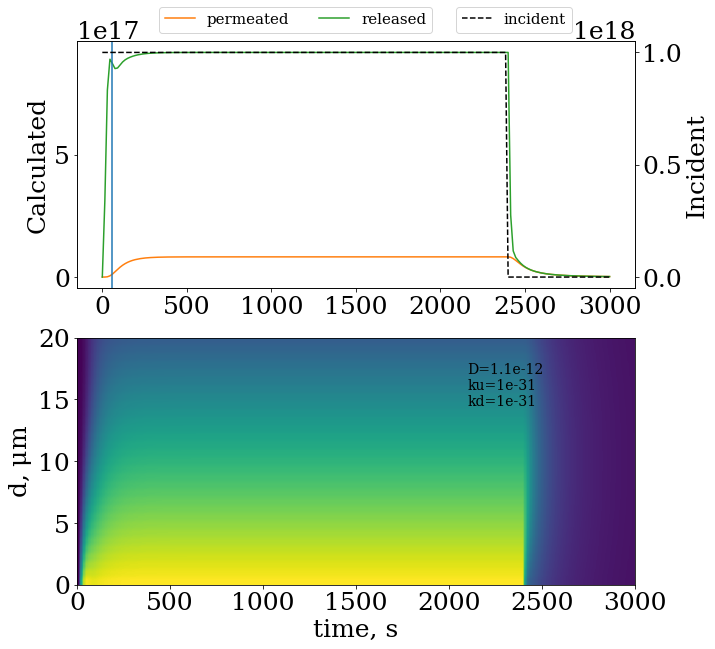

In [93]:
params['D'] =1.1e-12
k = 1e-31
params['ku']=k
params['kd']=k

%run ../oldcode/diffusion.py

result = BE(**params)
#print(f"{result['calctime']:.3f} s")
data = result['fluxes']

fig, axs = subplots(2,1)
gcf().set_size_inches([10,10])
ax = axs[0]

ax.plot(data['time'],data['perm'],'C1',label='permeated')
ax.plot(data['time'],data['rel'],'C2',label='released')
ax.axvline(60)
axt = ax.twinx()
axt.plot(data['time'],params['G']*params['ks'],'k--',label='incident')

ax.legend(ncol=2,loc=1,bbox_to_anchor=[0.65,1.17],fontsize=15,)
axt.legend(loc=1,bbox_to_anchor=[.9,1.17],fontsize=15)
ax.set_ylabel('Calculated')
axt.set_ylabel('Incident')
text(0.7,0.9,f"D={params['D']}\nku={params['ku']}\nkd={params['kd']}",transform=axs[1].transAxes,fontsize=14,va='top')

sca(axs[1])
extent = [0,params['T'],0,params['L']*1e6]
u = result['c']
imshow(u.T,aspect='auto',extent=extent,origin='lower')
xlabel('time, s')
_ = ylabel('d, $\mu m$')
#grid()
savefig('../figures/calc1.png', dpi=200, bbox_inches='tight',facecolor='w')

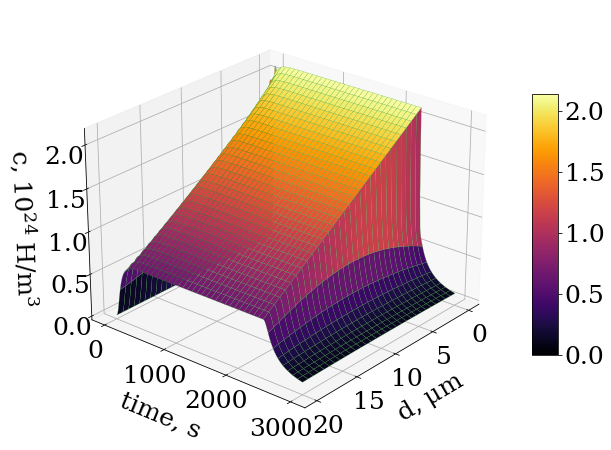

In [94]:
fig = plt.figure()
fig.set_size_inches([12,8])
ax = plt.axes(projection='3d')

x = np.linspace(0,params['L']*1e6,u.shape[1])
y = np.linspace(0,params['T'],u.shape[0])
x,y = np.meshgrid(x,y)
pwr = round(log10(u.max()))
a = u/(10**pwr)
a = a.astype(float)

surf = ax.plot_surface(x,y,a,cmap=cm.inferno,vmin=0,vmax=a.max(),edgecolor='C2',lw=0.2)
surf.set_facecolor((0,0,0,0))
fig.colorbar(surf, shrink=.6, aspect=10)
#ax.plot_wireframe(x,y,a)
ax.view_init(25,40)
xlabel('d, $\mu m$',labelpad=15)
ylabel('time, s',labelpad=20)
ax.set_zlabel(f'c, $10^{{{pwr}}}\;H/m^3$',labelpad=15)
savefig('../figures/3Dcalc1.png', dpi=200, bbox_inches='tight',facecolor='w')